# Test of the Ben Sira package

In [1]:
from pkg.Extraction import VariantsFinder
import re

[nltk_data] Downloading package punkt to /home/mari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]

In [3]:
vf = VariantsFinder(fileNames, folder = "WorkDir/")

# Matching Done
## Cleaning Done
### Collation Done
#### Distance Done


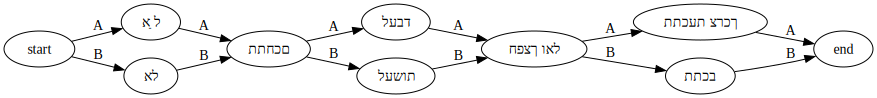

In [4]:
vf.getSampleVariant()

In [5]:
test = vf.witnesses[1]
print(test)

Verse 20 : aligned
+---+---+-------------------------------+-----------+
| A |   | בין אחים ראשם נכבד וירא אלהים | בעינ      |
| B | - | בין אחים ראשם נכבד וירא אלהים | נכבד ממנו |
+---+---+-------------------------------+-----------+


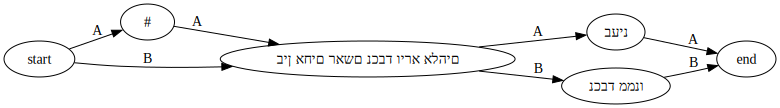

In [6]:
test.getSVG()

In [7]:
test.getHTML()

A,,בין אחים ראשם נכבד וירא אלהים,בעינ
B,-,בין אחים ראשם נכבד וירא אלהים,נכבד ממנו


In [8]:
print(test.getCSV())

A, ,בין אחים ראשם נכבד וירא אלהים ,בעינ
B,,בין אחים ראשם נכבד וירא אלהים ,נכבד ממנו



In [9]:
df = vf.getDF()
df

,Verse A,Verse B,Manuscript A,Manuscript B,Chapter A,Chapter B,Verse,Levenshtein,Hamming
0,טוב עובד ויותר הון ממתכבד חס מתן,טוב עובד ויותר הון ממתכבד,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,27,5,5
1,בין אחים ראשם נכבד וירא אלהים בעינ,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,20,6,8
2,אַל תתחכם לעבד חפצך ואל תתכעת צרכך,אל תתחכם לעשות חפצך ואל תתכב,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,26,8,11
3,גר וזר נכרי ורש תפארתם יאת אלהים,גר זר נכרי ורש תפארתם יראת ייי,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,22,6,9
4,אין לבזות דל משכיל ואין לכבד כל איש כם,אין לבזות דל משכיל ואין לכבד כל איש חמס,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,23,3,3
5,בני בענוה כבד נפשך ויתן לך טם כיוצא בﬣ,בני בענוה כבד נפשך ותן לה טעם כיוצ,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,28,6,9
6,עבד משכיל הורם ועבד ש לﬡ יתאונן,עבד משכיל חביב כנפש,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,25,15,17
7,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,31,12,16
8,ש מושל ושופט נכבדו ואן גדול מרא אלהים,שר שופט ומושל נכבדו וא גד,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,24,17,22
9,מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,בני מרשיע נפשו מי יצדיקנו ומי יכבד מ,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,29,7,8


In [10]:
print(vf.getLaTeX())

\begin{tabular}{llllllllrr}
\toprule
 & Verse A & Verse B & Manuscript A & Manuscript B & Chapter A & Chapter B & Verse & Levenshtein & Hamming \\
\midrule
0 &  טוב עובד ויותר הון ממתכבד חס מתן  & טוב עובד ויותר הון ממתכבד  & ms_a_new.xml & ms_b_new.xml & Chapter 10 & Siracide 10 & 27 & 5 & 5 \\
1 &  בין אחים ראשם נכבד וירא אלהים בעינ & בין אחים ראשם נכבד וירא אלהים נכבד ממנו & ms_a_new.xml & ms_b_new.xml & Chapter 10 & Siracide 10 & 20 & 6 & 8 \\
2 &  אַל תתחכם לעבד חפצך ואל תתכעת צרכך  & אל תתחכם לעשות חפצך ואל תתכב & ms_a_new.xml & ms_b_new.xml & Chapter 10 & Siracide 10 & 26 & 8 & 11 \\
3 &  גר וזר נכרי ורש תפארתם יאת אלהים & גר זר נכרי ורש תפארתם יראת ייי  & ms_a_new.xml & ms_b_new.xml & Chapter 10 & Siracide 10 & 22 & 6 & 9 \\
4 &  אין לבזות דל משכיל ואין לכבד כל איש כם  & אין לבזות דל משכיל ואין לכבד כל איש חמס & ms_a_new.xml & ms_b_new.xml & Chapter 10 & Siracide 10 & 23 & 3 & 3 \\
5 &  בני בענוה כבד נפשך ויתן לך טם כיוצא בﬣ  & בני בענוה כבד נפשך ותן לה טעם כיוצ & ms_a_new.xml 

In [11]:
test.distance()